In [7]:
import numpy as np
import timeit
import scipy
import matplotlib.pyplot as plt
import math
import sys
import timeit
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm
from numpy.linalg import pinv

# Linear Regression


*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$


*  Visualize loss convergent
*  Plot linear regression line 
*  Comparison:
    -  Time 
    -  MSE
    -  Matching parameter vectors $\beta$









In [8]:
# LOAD DATA
X, y = datasets.load_boston(return_X_y=True)
y = y.reshape(len(y), 1)
add = np.ones((506, 1))
X = np.append(add, X, axis = 1)


In [9]:
# IMPLEMENT NUMERICAL SOLUTION HERE
start = timeit.default_timer()
b = pinv(X.T.dot(X)).dot(X.T).dot(y)
y_pred = X.dot(b)
MSE = np.sum((y_pred - y) ** 2) / len(X)
stop = timeit.default_timer()

print('Time of NUMERICAL SOLUTION = ', stop - start)  
print("MSE =", MSE)

Time of NUMERICAL SOLUTION =  0.001388238000004094
MSE = 21.894831181729206


Time of LR CLASS not using momentum =  14.850953239000035
MSE = 23.622168565318113


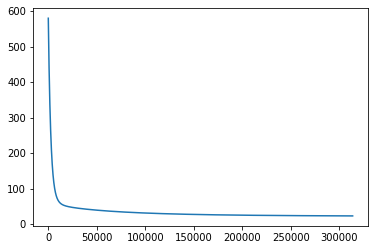

Time of LR CLASS using momentum =  0.013082730000007814
MSE = 21.939920144408507


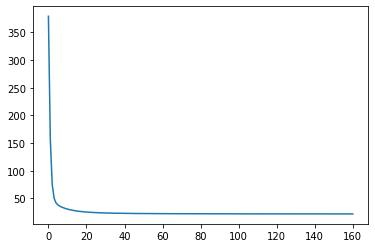

In [14]:

# IMPLEMENT GRADIENT DESCENT HERE
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class LinearRegression:
    def feature_scaling(self, X):
        for _ in range(1, X.shape[1]):
            mean = np.mean(X[:, _])
            s = np.amax(X[:, _]) - np.amin(X[:, _])
            X[:, _] = (X[:, _] - mean) / s
    def cost_function(self, X, y, beta):              
        return np.sum(((X @ beta) - y) ** 2) / len(X)
    
    def gradient(self, X, y, beta):
        return 2 / X.shape[0] * (X.T @ ((X @ beta) - y))
    
    def fit(self, X, y, tau = 1e-5, gamma = 1e-4):  
        #self.feature_scaling(X)
        # Em khong biet sao nhung neu khong feature_scaling thi trong may 
        # em chạy no se bi tran so cai cost_function
        loss = []
        beta = np.random.rand(X.shape[1], 1)
        N = len(X)
        cost_dif = 1
        while cost_dif >= tau:        
            curCost = self.cost_function(X, y, beta)
            grad = self.gradient(X, y, beta)
            beta = beta - (grad * gamma)
            newCost = self.cost_function(X, y, beta)
            loss.append(newCost)
            cost_dif = abs(curCost - newCost)
        # Saving Progress
          
        self.beta = beta
        self.loss = loss
    
    def predict(self, X):        
        return X.dot(self.beta)

    def fit_momentum(self, X, y, tau = 0.001, gamma =0.9, alpha = 0.1): 
        
        loss = []
        beta = np.random.rand(X.shape[1], 1)
         
        N = len(X)
        lstDeltaB = np.zeros([X.shape[1], 1])
        cost_dif = 1
        while cost_dif >= tau:        
            # Gradient Descent with momentum
            curCost = self.cost_function(X, y, beta)
            grad = self.gradient(X, y, beta)
            newDeltaB = -gamma * grad + alpha * lstDeltaB
            beta = beta + newDeltaB
            lstDeltaB = newDeltaB
            newCost = self.cost_function(X, y, beta)
            loss.append(newCost)
            cost_dif = abs(curCost - newCost)
            # Saving Progress

        self.beta = beta
        self.loss = loss
model = LinearRegression()
start = timeit.default_timer()
model.fit(X, y)
stop = timeit.default_timer()
print('Time of LR CLASS not using momentum = ', stop - start)  
MSE = model.cost_function(X, y, model.beta)
print("MSE =", MSE)
x_coordinates = np.arange(len(model.loss))
plt.plot(x_coordinates, model.loss)
plt.show()
start = timeit.default_timer()
model.fit_momentum(X, y)
stop = timeit.default_timer()
print('Time of LR CLASS using momentum = ', stop - start) 
MSE = model.cost_function(X, y, model.beta)
print("MSE =", MSE) 
x_coordinates = np.arange(len(model.loss))
plt.plot(x_coordinates, model.loss)
plt.show()

In [5]:
# VISUALIZATION

In [15]:
# SOLUTION FROM SKLEARN
regr = sklearn.linear_model.LinearRegression()
start = timeit.default_timer()
regr.fit(X, y)
stop = timeit.default_timer()
print('Time of SKLEARN = ', stop - start) 
y_pred = regr.predict(X)
MSE = sklearn.metrics.mean_squared_error(y, y_pred)
print("MSE =", MSE)


Time of SKLEARN =  0.0014871029999881102
MSE = 21.894831181729202


Nhận xét:
* Time: Dùng **Numerial Solution** chạy chỉ trong 0.00135s, khá nhanh so với **LR Class** là 0.0105s (không dùng momentum) và 0.0092s (dùng momentum) và **SKLearn** là 0.0048s. Có lẽ là vì số feature là 14 khá ít nên dùng **Numerial Solution** clean và chạy nhanh hơn.
* MSE: Dùng **Numerial Solution** và **SKLearn** cho MSE thấp nhất có thể là 21.8948, còn **LR Class** cho MSE trong khoảng 21.92 - 21.95.

# Logistic Regression

*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


#   Numerical solution:

*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$

*   Logistic function : $\sigma(t) = \frac{1}{1+e^{-t}}$
      

In [16]:
X, y = datasets.load_breast_cancer(return_X_y = True)
y = y.reshape(len(y), 1)

Time of LOGISTIC REGRESSION =  0.3017312189999757
LE = 0.2040170664707745


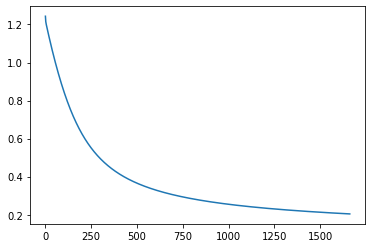

In [17]:
epsilon = 1e-9
def L(y, y_pred):
    return float(((y.T @ np.log(y_pred + epsilon)) + ((1 - y).T @ np.log(1 - y_pred + epsilon))) / -len(y))
    # + epsilon boi vi no lay trung np.log(0) la bi error
class LogisticRegression:
    def feature_scaling(self, X):
        for _ in range(1, X.shape[1]):
            mean = np.mean(X[:, _])
            s = np.amax(X[:, _]) - np.amin(X[:, _])
            X[:, _] = (X[:, _] - mean) / s
    def sigmoid(self, t): #sigmoid function
        return 1 / (1 + np.exp(-t))
    
    def cost_function(self, X, y, beta):        
        tem = self.sigmoid(X @ beta)
        return L(y, tem)

    def grad_function(self, X, y, beta):
        return 1 / X.shape[0] * (X.T @ (self.sigmoid(X @ beta) - y))
    def fit(self, X, y, tau = 0.00005, gamma = 0.04):  
        self.feature_scaling(X)
        # feature_scaling de khong tran so e^(-t)
        loss = []
        beta = np.random.rand(X.shape[1], 1)
        N = len(X)
        cost_dif = tau
        while cost_dif >= tau:        
            # Gradient Descent
            curCost = self.cost_function(X, y, beta)
            grad = self.grad_function(X, y, beta)
            beta = beta - gamma * grad
            newCost = self.cost_function(X, y, beta)
            cost_dif = abs(newCost - curCost)
            loss.append(newCost)
            # Saving Progress
        self.beta = beta
        self.loss = loss

    def predict(self, X):        
        return self.sigmoid(X @ self.beta)
model = LogisticRegression()
start = timeit.default_timer()
model.fit(X, y)
stop = timeit.default_timer()
print('Time of LOGISTIC REGRESSION = ', stop - start)  
LE = model.cost_function(X, y, model.beta)
print("LE =", LE)
x_coordinates = np.arange(len(model.loss))
plt.plot(x_coordinates, model.loss)
plt.show()

# Support Vector Machine


*   Dataset: breast cancer
*   Objective: understand how SVM work/ the effects of choosing kernels on dataset



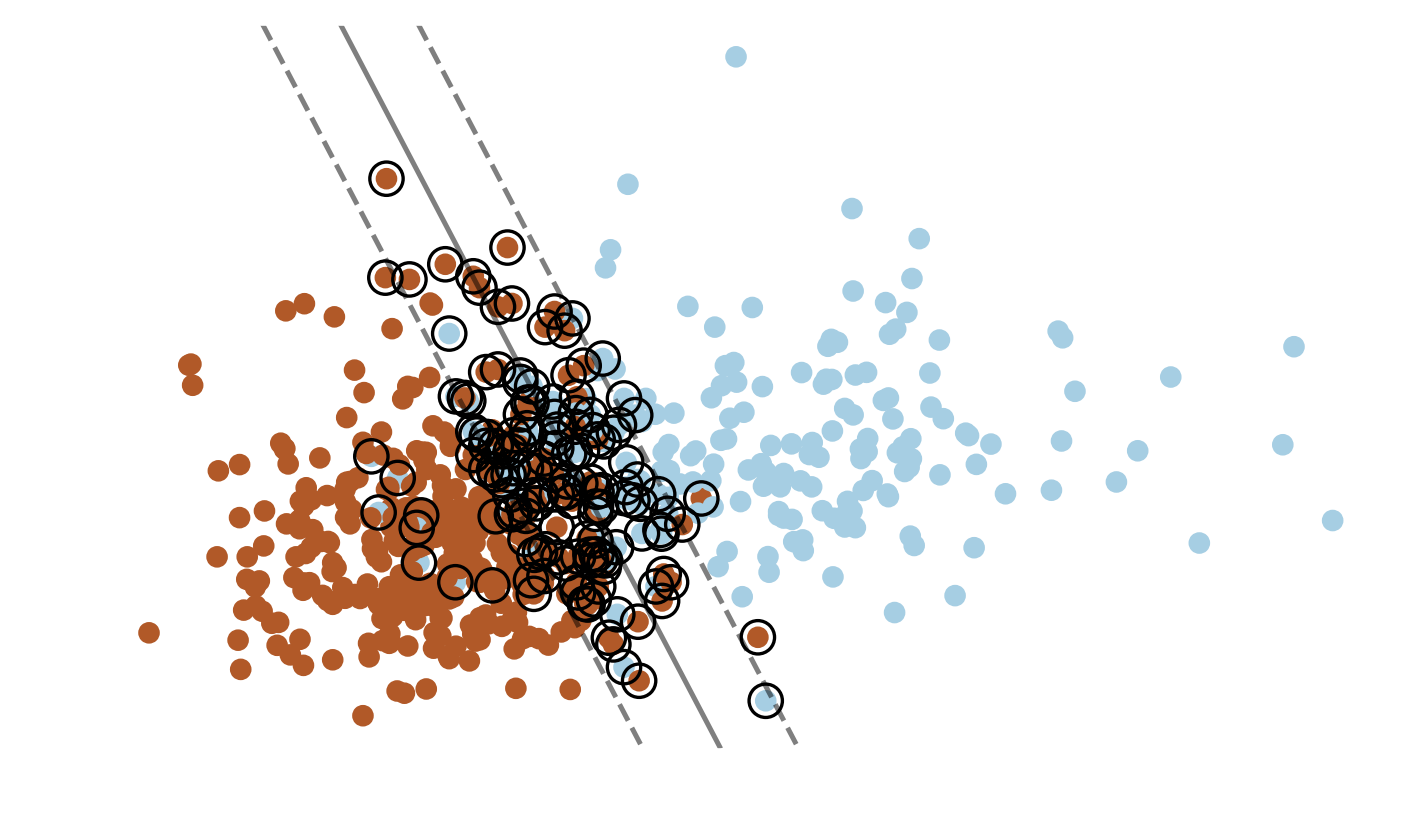

In [9]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()